0.33221292198629326


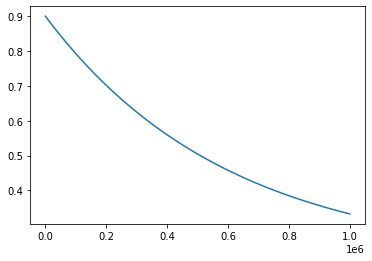

In [4]:
#from train import EPS_START, EPS_DECAY, EPS_END

GAMMA = 0.9
EPS_START = 0.9
EPS_END = 0.2
EPS_DECAY = 600_000
TARGET_UPDATE = 10

rows = 6
cols = 7
batch = 10_000

import matplotlib.pyplot as plt
import numpy as np

max_gen = 1000_000
x = np.linspace(0, max_gen)
y = EPS_END + (EPS_START - EPS_END) * np.exp(-1. * x / EPS_DECAY)
plt.plot(x, y)
print(y[-1])

- Il greedy algorithm non vede i "buchi". Correggere.
- Creare un modello che giudichi lo stato dopo aver effettuato la mossa, e applicarlo su tutti gli esiti possibili.
- Far giocare i modelli ottenuti tra di loro, per creare una classifica
- Dare come input un valore aleatorio
Dare come input lo storico delle mosse

In [44]:
with open("frank/leaderboard.txt", "r") as f:
    dic = eval(f.read())
import pandas as pd
dic: dict
df = pd.DataFrame([{"model": path.split("\\")[-1].split("/")[-1], 'contest_score': value} for path, value in dic.items()])
df

,model,contest_score
0,model-adv_104870001.pth,-0.224745
1,model-adv_110620001.pth,-0.157360
2,model-adv_116370001.pth,-0.127518
3,model-adv_122120001.pth,-0.156372
4,model-adv_127870001.pth,-0.143169
...,...,...
337,model_960370001.pth,0.093294
338,model_966120001.pth,0.057147
339,model_971870001.pth,0.106585
340,model_977620001.pth,0.095172


In [37]:
with open("frank/scores.txt", "r") as f:
    dic2 = eval(f.read())
dic2
dic2

{'C:\\Users\\p.menegatti\\Documents\\Python Scripts\\test_paolo\\models\\model-adv_104870001.pth': {'n_match': 1680,
  'average_len': 11.904761904761905,
  'ratio_error': 0.0,
  'ratio_win': 0.7738095238095238,
  'ratio_lost': 0.16785714285714284,
  'score': 4.609929078014185},
 'C:\\Users\\p.menegatti\\Documents\\Python Scripts\\test_paolo\\models\\model-adv_110620001.pth': {'n_match': 1725,
  'average_len': 11.594202898550725,
  'ratio_error': 0.0011594202898550724,
  'ratio_win': 0.6666666666666666,
  'ratio_lost': 0.29739130434782607,
  'score': 2.233009708737864},
 'C:\\Users\\p.menegatti\\Documents\\Python Scripts\\test_paolo\\models\\model-adv_116370001.pth': {'n_match': 1568,
  'average_len': 12.755102040816327,
  'ratio_error': 0.0,
  'ratio_win': 0.8227040816326531,
  'ratio_lost': 0.13966836734693877,
  'score': 5.890410958904109},
 'C:\\Users\\p.menegatti\\Documents\\Python Scripts\\test_paolo\\models\\model-adv_122120001.pth': {'n_match': 1539,
  'average_len': 12.99545159

In [45]:
df_scores = pd.DataFrame([{"model": path.split("\\")[-1].split("/")[-1], 'score': value["ratio_win"] - value["ratio_lost"]} for path, value in dic2.items()])
df_scores
compare = pd.merge(df, df_scores, on="model")
compare

,model,contest_score,score
0,model-adv_104870001.pth,-0.224745,0.605952
1,model-adv_110620001.pth,-0.157360,0.369275
2,model-adv_116370001.pth,-0.127518,0.683036
3,model-adv_122120001.pth,-0.156372,0.491878
4,model-adv_127870001.pth,-0.143169,0.515352
...,...,...,...
337,model_960370001.pth,0.093294,0.683855
338,model_966120001.pth,0.057147,0.786559
339,model_971870001.pth,0.106585,0.740397
340,model_977620001.pth,0.095172,0.716726


In [83]:
df_scores = pd.DataFrame([{"model": path.split("\\")[-1].split("/")[-1], **score} for path, score in dic2.items()])
df_scores
df_scores["score2"] = df_scores["ratio_win"] -  df_scores["ratio_lost"] -  10*df_scores["ratio_error"]
compare = pd.merge(df, df_scores, on="model")
compare["move"] = compare["model"].str.split(".").str[-2].str.split("_").str[-1].astype(int)
compare["adv"] = compare["model"].str.contains("adv")
compare

,model,contest_score,n_match,average_len,ratio_error,ratio_win,ratio_lost,score,score2,move,adv
0,model-adv_104870001.pth,-0.224745,1680,11.904762,0.000000,0.773810,0.167857,4.609929,0.605952,104870001,True
1,model-adv_110620001.pth,-0.157360,1725,11.594203,0.001159,0.666667,0.297391,2.233010,0.357681,110620001,True
2,model-adv_116370001.pth,-0.127518,1568,12.755102,0.000000,0.822704,0.139668,5.890411,0.683036,116370001,True
3,model-adv_122120001.pth,-0.156372,1539,12.995452,0.000000,0.720598,0.228720,3.150568,0.491878,122120001,True
4,model-adv_127870001.pth,-0.143169,1661,12.040939,0.000000,0.732691,0.217339,3.371191,0.515352,127870001,True
...,...,...,...,...,...,...,...,...,...,...,...
337,model_960370001.pth,0.093294,1629,12.277471,0.000000,0.825660,0.141805,5.822511,0.683855,960370001,False
338,model_966120001.pth,0.057147,1607,12.445551,0.000000,0.884256,0.097698,9.050955,0.786559,966120001,False
339,model_971870001.pth,0.106585,1614,12.391574,0.000000,0.853160,0.112763,7.565934,0.740397,971870001,False
340,model_977620001.pth,0.095172,1698,11.778563,0.000000,0.851590,0.134865,6.314410,0.716726,977620001,False


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(compare["contest_score"], compare["score"])

(-0.25, 1.0)

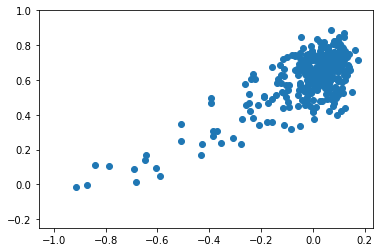

In [60]:
plt.scatter(compare["contest_score"], compare["score2"])
plt.ylim([-0.25,1])

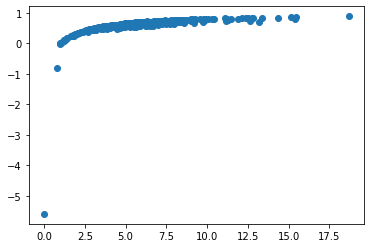

In [55]:
plt.scatter(compare["score"], compare["score2"])

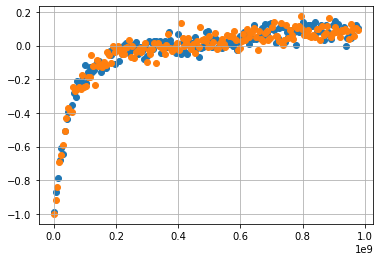

In [92]:
adv = compare[compare["adv"]].index
first = compare[~compare["adv"]].index

plt.scatter(compare.loc[adv, "move"], compare.loc[adv, "contest_score"])
plt.scatter(compare.loc[first, "move"], compare.loc[first, "contest_score"])
plt.grid()